In [2]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import seaborn as sns
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
## Load training dataset
# Make sure you are in the main folder('..\Algal-bloom-prediction-machine-learning')
cd = os.getcwd()
print(cd)
while cd.split('\\')[-1]!='Algal-bloom-prediction-machine-learning':
    os.chdir('..')
    cd=os.getcwd()
os.chdir('Trainning data')

print('Load training data (containing nutrient observations)')
lakename = input('Lake name in short: ')
winter = input('Winter data or not? (Y/N)')
if winter =='Y':
    all_df = pd.read_csv(lakename+'_Observation_df.csv',sep = '\t',parse_dates = ['Date'])
else:
    all_df = pd.read_csv(lakename+'_Observation_df_nowinter.csv',sep = '\t',parse_dates = ['Date'])

C:\Users\shuli278\Documents\D\PDF_Uppsala\7-Python code of ML algorithm\GitHub\Algal-bloom-prediction-machine-learning\Algal-bloom-prediction-machine-learning
Load training data (containing nutrient observations)
Lake name in short: Erken
Winter data or not? (Y/N)N


In [4]:
def metrics(obs_df,model_df,nutrient,test_time):
    df = obs_df[['Date',nutrient]].merge(model_df[['Date',nutrient]],how = 'inner',on = 'Date').dropna()
    df.columns = ['Date','Obs','PM']
    Comp = df[df['Date']>=test_time[0]]
    RMSE = sqrt(mean_squared_error(Comp['Obs'], Comp['PM']))
    R2 = r2_score(Comp['Obs'], Comp['PM'])
    print(nutrient+' RMSE: %.2f' % RMSE)
    print(nutrient+' R2: %.2f' % R2)
    print('\n')
    return Comp

In [5]:
# Create scatter comparison
def compare(observation,GBR,LSTM,chl_name):    
    comparison = observation[['Date',chl_name]].merge(GBR[['Date',chl_name]],on = 'Date',how = 'inner').merge(LSTM[['Date',chl_name]],on = 'Date',how = 'inner')
    comparison.columns = ['Date','Observation','GBR prediction','LSTM prediction']    
    return comparison

In [6]:
def plot_figure(observation,GBR,LSTM,comparison,chl_name,test_time,marker,ms,lw,figure_name):
    plt.style.use('seaborn-whitegrid')
    size = 20
    markersize = 8
    params = {'legend.fontsize': 16,
              'axes.labelsize': size,
              'axes.titlesize': size,
              'xtick.labelsize': size*0.75,
              'ytick.labelsize': size*0.75,
              'font.family':'Times New Roman'}
    plt.rcParams.update(params)

    f = plt.figure(figsize = (14,16))
    gs = f.add_gridspec(2,2,height_ratios = [3.5,3])
    gs.tight_layout(f,rect=[0, 0, 0.5, 1.0])
    f_ax1 = f.add_subplot(gs[0,:])
    f_ax2 = f.add_subplot(gs[1,0])
    f_ax3 = f.add_subplot(gs[1,1])
    
    if marker == True:
        observation.plot(x = 'Date',y = chl_name,ax = f_ax1,style = 'r*',ms = markersize,alpha = 0.9,label = 'Observation')
        GBR.plot(x = 'Date',y = chl_name,ax = f_ax1,style = 'ko',ms = ms,alpha = 0.5,label = 'GBR prediction')
        LSTM.plot(x = 'Date',y = chl_name,ax = f_ax1,style = 'bo',ms = ms,alpha = 0.5,label = 'LSTM prediction')
    else:
        observation.plot(x = 'Date',y = chl_name,ax = f_ax1,style = 'r*',ms = markersize,alpha = 0.9,label = 'Observation')
        GBR.plot(x = 'Date',y = chl_name,ax = f_ax1,color = 'k',lw = lw,alpha = 0.8,label = 'GBR prediction')
        LSTM.plot(x = 'Date',y = chl_name,ax = f_ax1,color = 'b',lw = lw,alpha = 0.8,label = 'LSTM prediction')
        #PB.plot(x = 'Date',y = 'Chl',ax = f_ax1,color = 'g',lw = lw,alpha = 0.8,label = 'PB prediction')
        
    f_ax1.set_xlim(test_time[0],test_time[1])
    f_ax1.set_ylabel('$mg/m^{3}$')
    f_ax1.set_title('(a)',x=0.02, y=0.92)
    f_ax1.grid(axis = 'y')

    f_ax2.scatter(comparison['Observation'],comparison['GBR prediction'],s = 20,c = 'black')
    f_ax2.plot(comparison['Observation'],comparison['Observation'],lw  =1.5,color = 'red',alpha = 0.7)
    f_ax2.set_xlabel('Observation')
    f_ax2.set_ylabel('GBR prediction')
    f_ax2.set_xlim((0,50))
    f_ax2.set_ylim((0,50))
    f_ax2.set_title('(b)',x=0.04, y=0.9)

    f_ax3.scatter(comparison['Observation'],comparison['LSTM prediction'],s = 20,c = 'blue')
    f_ax3.plot(comparison['Observation'],comparison['Observation'],lw  =1.5,color = 'red',alpha = 0.7)
    f_ax3.set_xlabel('Observation')
    f_ax3.set_ylabel('LSTM prediction')
    f_ax3.set_xlim((0,50))
    f_ax3.set_ylim((0,50))
    f_ax3.set_title('(c)',x=0.04, y=0.9)

    plt.subplots_adjust(hspace=0.3)
    f.savefig(figure_name)

In [7]:
def plot_nutrients_comparison(Observation,GBR,LSTM,nutrients,nrows,ncol,time_range,ylim,ylabel,subtitle):
    plt.style.use('seaborn-whitegrid')
    size=24
    params = {'legend.fontsize': 20,
              'axes.labelsize': size,
              'axes.titlesize': size,
              'xtick.labelsize': size*0.75,
              'ytick.labelsize': size*0.75,
              'font.family':'Times New Roman'}
    plt.rcParams.update(params)
    #PB.plot(x = 'Date',y =nutrients,ax = ax[nrows][ncol],c = 'g',lw = 2,alpha = 0.7,
    #        label = 'PB model_'+nutrients.split('(')[0],
    #        xlim = time_range,ylim = ylim)
    GBR.plot(x = 'Date',y =nutrients,ax = ax[nrows][ncol],c = 'k',lw = 2,
                   label = 'GBR_'+nutrients.split('(')[0],alpha = 0.7,
                   xlim = time_range,ylim = ylim)
    LSTM.plot(x = 'Date',y = nutrients,ax = ax[nrows][ncol], c= 'b',lw = 2,
                  label = 'LSTM_'+nutrients.split('(')[0],alpha = 0.7,
                xlim = time_range,ylim = ylim)
    Observation.plot(x = 'Date',y =nutrients,ax = ax[nrows][ncol], style= 'r*',ms = 10,alpha = 0.9,
              label = 'Observed_'+nutrients.split('(')[0],
              xlim = time_range,ylim = ylim)

    ax[nrows][ncol].set_ylabel(ylabel)
    ax[nrows][ncol].legend(frameon=False,ncol=2)
    ax[nrows][ncol].patch.set_alpha(0.5)
    ax[nrows][ncol].grid(axis = 'y')
    ax[nrows][ncol].set_title(subtitle,x=0.04, y=0.92)
    #plt.tight_layout()

In [8]:
# Load the predicted results
cd = os.getcwd()
print(cd)
while cd.split('\\')[-1]!='Algal-bloom-prediction-machine-learning':
    os.chdir('..')
    cd=os.getcwd()

os.chdir('Scenario2\\GBR\\'+lakename)
GBR = pd.read_csv(lakename+'_GBR predicted nutrient and Chl.csv',parse_dates = ['Date'])
os.chdir('..\\..')
os.chdir('LSTM\\'+lakename)
LSTM = pd.read_csv('LSTM predicted nutrient and Chl data.csv',sep='\t',parse_dates = ['Date'])

print(GBR.columns)
n_Nut=int(input('Number of nutrients: '))
Nut_list=[]
for i in range(n_Nut):
    Nut=input('Nutrient: ')
    Nut_list.append(Nut)

C:\Users\shuli278\Documents\D\PDF_Uppsala\7-Python code of ML algorithm\GitHub\Algal-bloom-prediction-machine-learning\Algal-bloom-prediction-machine-learning\Trainning data
Index(['Date', 'delT', 'U', 'AirT', 'Humidity', 'CC', 'Prec(mm/d)',
       'swr(w/m2)', 'inflow(m3/s)', 'outflow(m3/s)', 'Ice_d',
       'days from iceoff', 'MLD', 'W', 'thermD', 'O2(mmole/m3)', 'O2', 'NOX',
       'NH4', 'PO4', 'Si', 'TotP', 'Chl'],
      dtype='object')
Number of nutrients: 7
Nutrient: O2
Nutrient: NOX
Nutrient: NH4
Nutrient: PO4
Nutrient: Si
Nutrient: TotP
Nutrient: Chl


Testing time from 2017-04-01 00:00:00 to 2020-11-30 00:00:00
test starts in year:2017
test ends in year:2021
Chlorophyll name:Chl


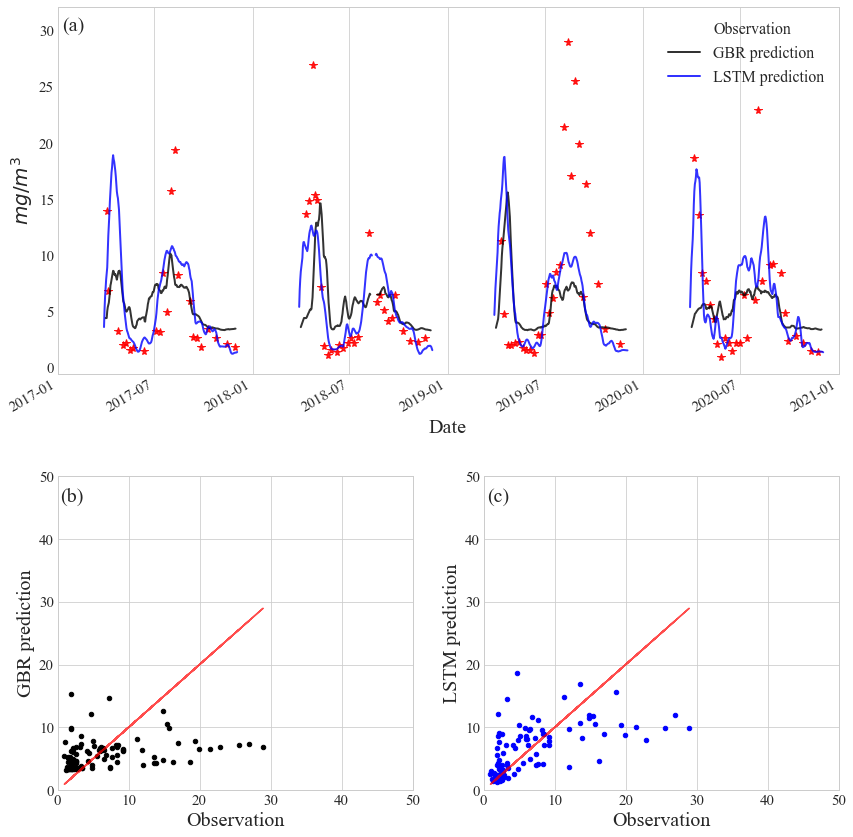

In [9]:
# Create the time-series of prediction
print('Testing time from {} to {}'.format(GBR['Date'].min(),GBR['Date'].max()))

test_time = [pd.Timestamp(int(input('test starts in year:')),1,1),pd.Timestamp(int(input('test ends in year:')),1,1)]
ts = pd.DataFrame(pd.date_range(start =test_time[0],
                                end = test_time[1]),columns = ['Date'])
Nut_list.insert(0,'Date')
GBR_ts = ts.merge(GBR,how = 'left',on = 'Date')[Nut_list]
LSTM_ts = ts.merge(LSTM,how = 'left',on = 'Date')[Nut_list]
Nut_list.pop(0)
LSTM_ts[Nut_list] = LSTM_ts[Nut_list].rolling(7,min_periods = 1,center=True).mean()
chl_name=input('Chlorophyll name:')

comparison = compare(all_df,GBR_ts,LSTM_ts,chl_name)
plot_figure(all_df,GBR_ts,LSTM_ts,comparison,chl_name,test_time,False,8,2,'Chl_comparison.png')

In [10]:
print('GBR evaluating metrics:')
GBR_comp = metrics(all_df,GBR,chl_name,test_time)
print('LSTM evaluating metrics:')
LSTM_comp = metrics(all_df,LSTM,chl_name,test_time)

GBR evaluating metrics:
Chl RMSE: 6.04
Chl R2: 0.07


LSTM evaluating metrics:
Chl RMSE: 5.09
Chl R2: 0.34




In [11]:
print(Nut_list)

['O2', 'NOX', 'NH4', 'PO4', 'Si', 'TotP', 'Chl']


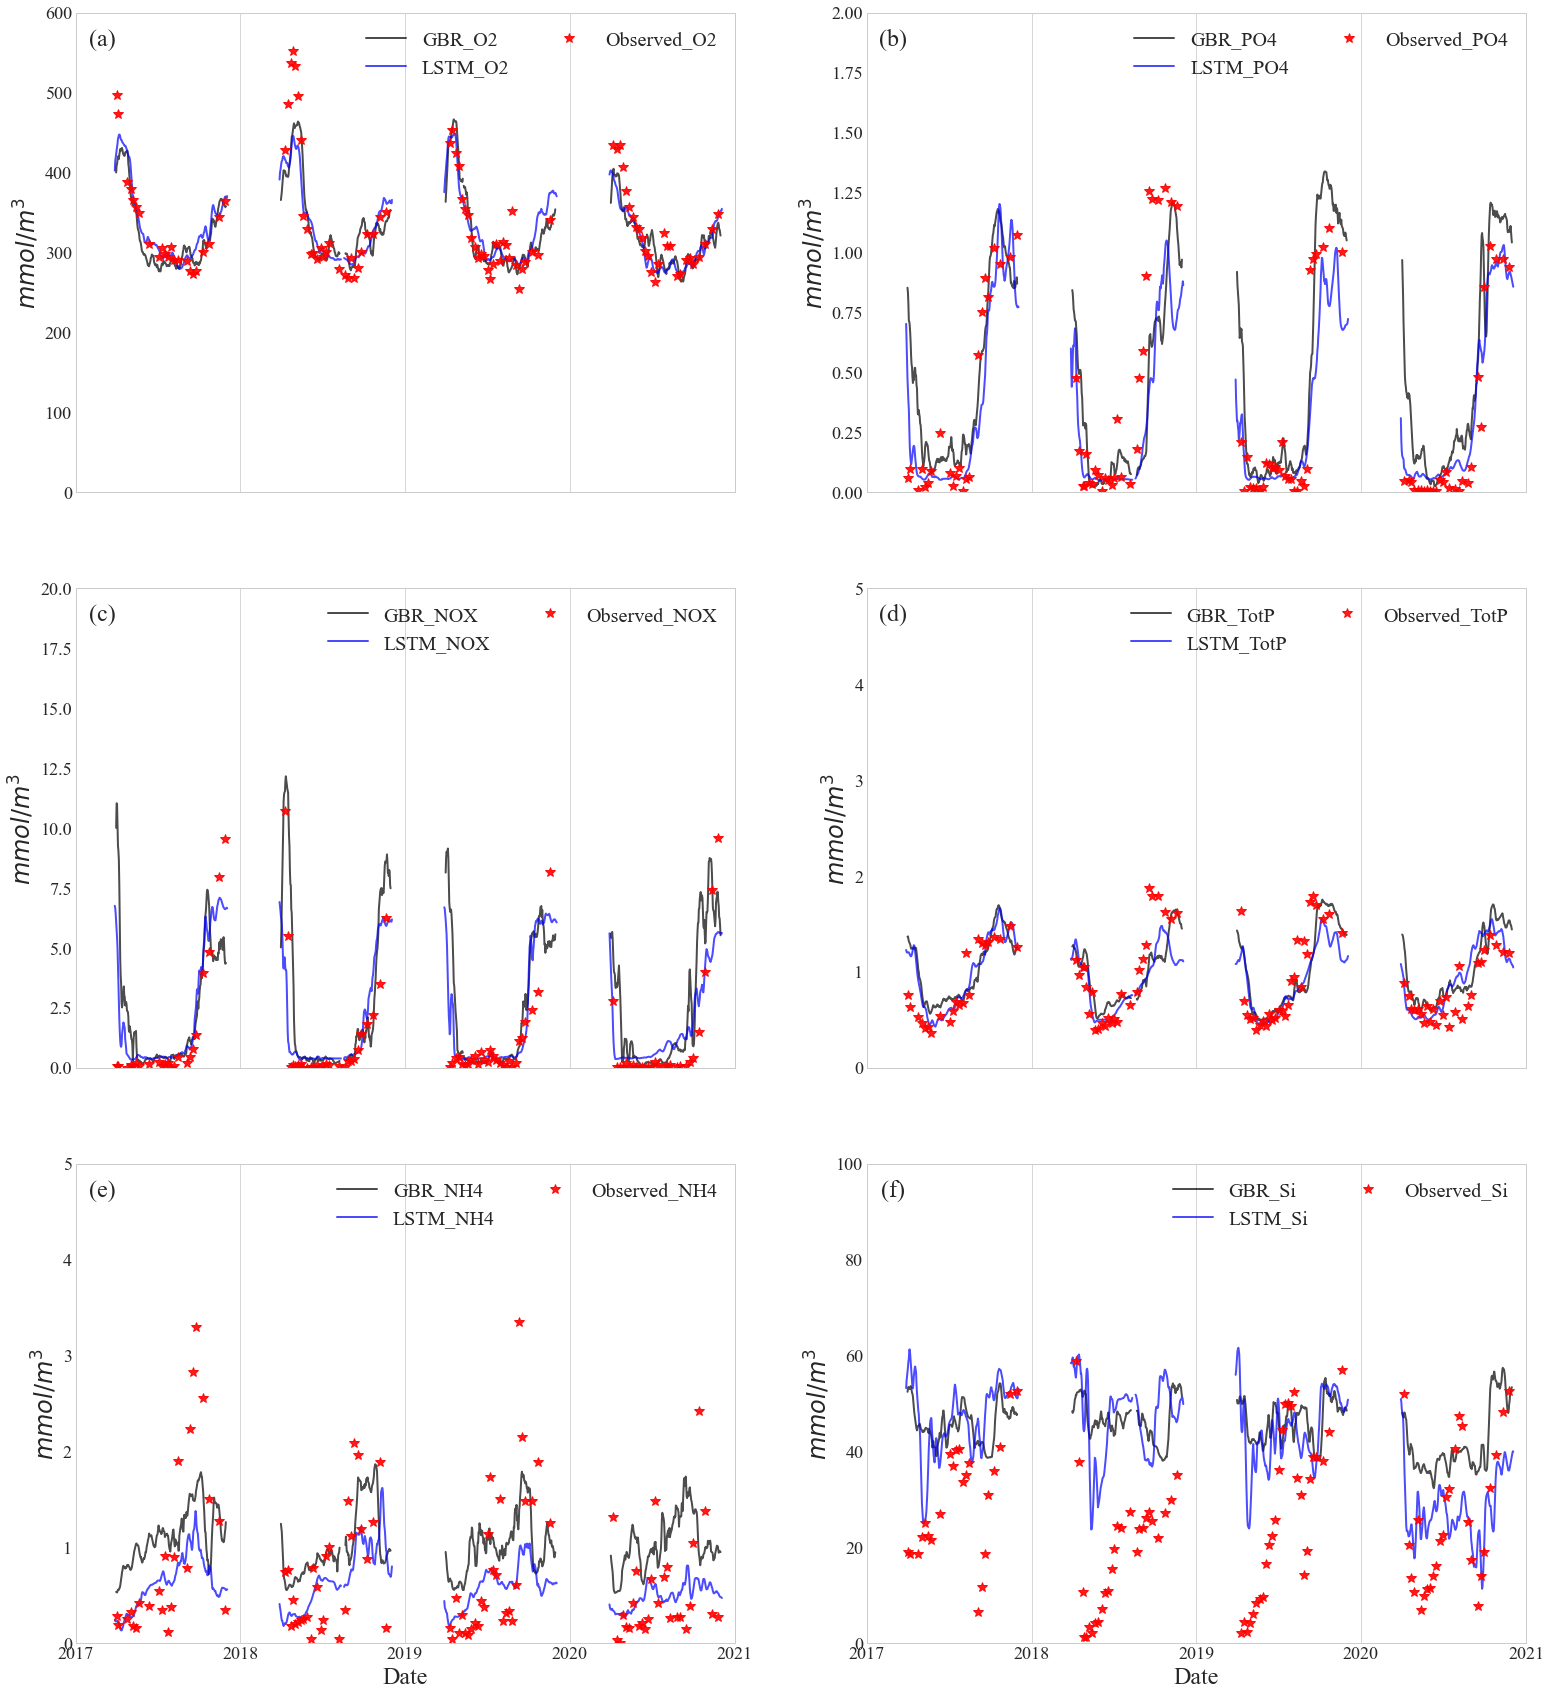

In [20]:
f1,ax = plt.subplots(nrows = 3,ncols = 2,sharex=True,figsize = (26,30))
plot_nutrients_comparison(all_df,GBR_ts,LSTM_ts,'O2',0,0,test_time,(0,600),'$mmol/m^{3}$','(a)')
plot_nutrients_comparison(all_df,GBR_ts,LSTM_ts,'NOX',1,0,test_time,(0,20),'$mmol/m^{3}$','(c)')
plot_nutrients_comparison(all_df,GBR_ts,LSTM_ts,'NH4',2,0,test_time,(0,5),'$mmol/m^{3}$','(e)')
plot_nutrients_comparison(all_df,GBR_ts,LSTM_ts,'PO4',0,1,test_time,(0,2),'$mmol/m^{3}$','(b)')
plot_nutrients_comparison(all_df,GBR_ts,LSTM_ts,'TotP',1,1,test_time,(0,5),'$mmol/m^{3}$','(d)')
plot_nutrients_comparison(all_df,GBR_ts,LSTM_ts,'Si',2,1,test_time,(0,100),'$mmol/m^{3}$','(f)')
#plot_nutrients_comparison(all_df,GBR_ts,LSTM_ts,'TOTN',3,0,test_time,(0,2000),'$mmol/m^{3}$','(g)')
#plot_nutrients_comparison(all_df,GBR_ts,LSTM_ts,'TOC',3,1,test_time,(0,15),'$mmol/m^{3}$','(h)')


In [21]:
f1.savefig('nutrient_comparison.png',dpi = 300)